In [19]:
#Import all the needed libraries and packages
#Analyzing from source: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE266012
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_DMSO=pd.read_csv('GSM8239427_DMSO_peaks.txt',skiprows=21, delimiter=r'\s+')
print(df_DMSO.head(10))

    chr   start     end  length  abs_summit  pileup  -log10(pvalue)  \
0  chr1   26488   26957     470       26615   273.0       277.20926   
1  chr1   90268   90997     730       90782   112.0       102.97145   
2  chr1  124436  124830     395      124500    51.0        39.29843   
3  chr1  171344  171715     372      171530    26.0         9.75355   
4  chr1  184199  184563     365      184203    36.0        15.56197   
5  chr1  186882  187306     425      186902   125.0       113.17319   
6  chr1  205883  206321     439      206126   209.0       219.11647   
7  chr1  261268  261983     716      261583   393.0       411.42297   
8  chr1  350950  351388     439      351118    93.0        93.02438   
9  chr1  403343  403738     396      403486   123.0        78.00876   

   fold_enrichment  -log10(qvalue)          name  
0         24.19091       274.59909   DMSO_peak_1  
1         17.35841       100.76988   DMSO_peak_2  
2         10.80165        37.22202   DMSO_peak_3  
3          3.9

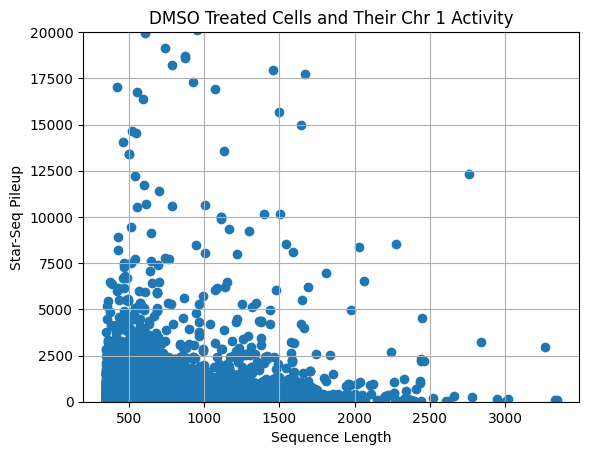

In [20]:
#Visualize the data

plt.scatter(df_DMSO['length'],df_DMSO['pileup'])
plt.title('DMSO Treated Cells and Their Chr 1 Activity')
plt.grid()
plt.xlabel('Sequence Length')
plt.ylabel('Star-Seq Pileup')
plt.ylim(top=20000)
plt.ylim(bottom=0)
plt.show()

In [21]:
# Setting x and y values
x=df_DMSO['length']
y=df_DMSO['pileup']



In [35]:
# Generating logistic model function that will produce predicted y-values

def log_model(x_dat,w,b):
    g=[]
    z=[]
    for i in x_dat:
        z.append(int(w*i+b))
    for i in z:
        g.append(1/(1+ np.e**-i))
    return g


In [47]:
#Test the function
#uncomment line below to test
y_hat=log_model(x,0.1,0)

In [50]:
#Find the cost to validate potential w values that make a model a good fit

def calc_cost(x_dat,w,y_dat):
    cost=0
    for num in range(len(x_dat)):
        cost+=-y_dat[num]*np.log(y_hat[num])-(1-y_dat[num])*np.log(1-y_hat[num])
        cost=cost/len(x_dat)
    return cost

In [51]:
calc_cost(x,0.1,y)

/tmp/ipykernel_560/1902516702.py:6: RuntimeWarning: divide by zero encountered in log
  cost+=-y_dat[num]*np.log(y_hat[num])-(1-y_dat[num])*np.log(1-y_hat[num])


-inf